In [103]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical,plot_model
from keras import backend as k

In [104]:
from keras.datasets import mnist

In [105]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [106]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [107]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))

# count unique numbers in test labels
unique,counts=np.unique(y_test,return_counts=True)
print('Test labels:',dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


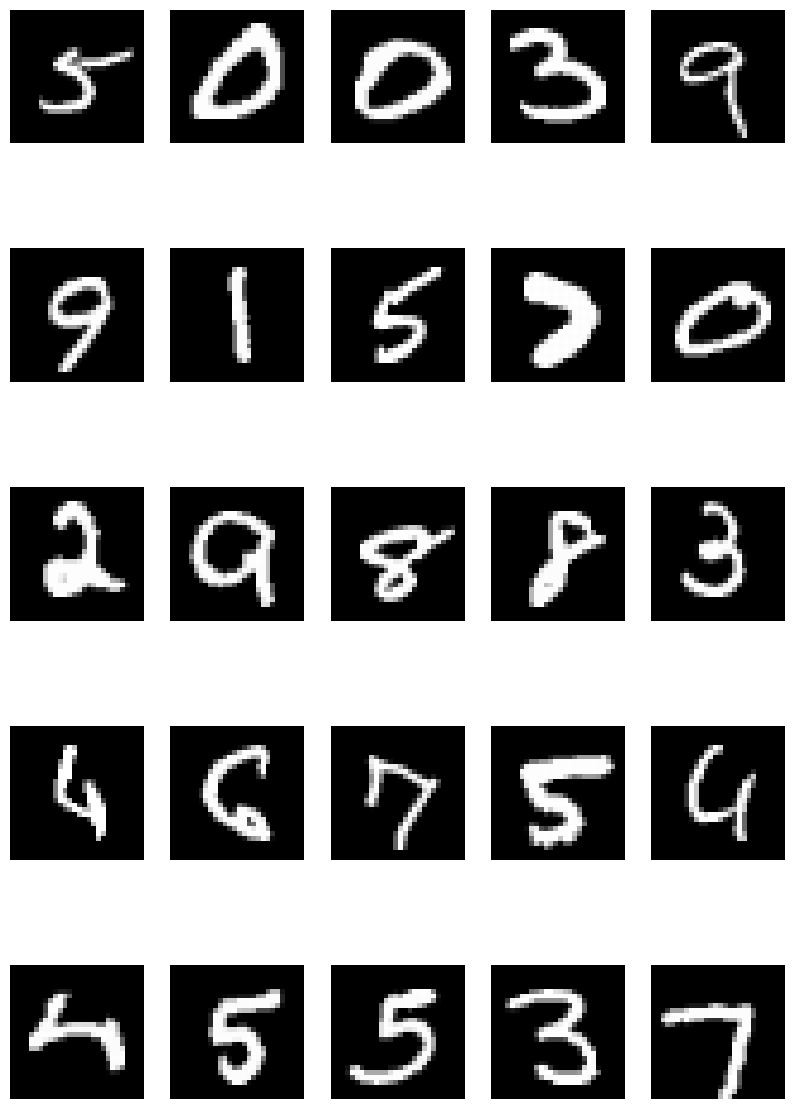

In [108]:
indexes=np.random.randint(0,x_train.shape[0],size=25)
images=x_train[indexes]
labels=y_train[indexes]

# plot 25 mnist digits
plt.figure(figsize=(10,15))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image=images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    
plt.show()
# plt.savefig('mnist-samples.png')
# plt.close('all')

    


In [109]:
# compute number of labels
num_labels=len(np.unique(y_train))
num_labels

10

In [110]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [111]:
x_train.shape

(60000, 28, 28)

In [112]:
# image dimensions
image_size=x_train.shape[1]
input_size=image_size * image_size
input_size

784

In [113]:
# resize and normalize the data
x_train=np.reshape(x_train,[-1,input_size])
x_train=x_train.astype('float')/255
x_test=np.reshape(x_test,[-1,input_size])
x_test=x_test.astype('float')/255

In [114]:
unique_values = np.unique(y_train)
num_unique_values = len(unique_values)
num_unique_values
# so there is no need for y_train because it only contain two values as 0 and 1

2

In [115]:
x_train.shape

(60000, 784)

# Building Neural Network

In [116]:
# input parameters
batch_size=128
hidden_units=256
# dropout=0.45

In [117]:
model=Sequential()
model.add(Dense(hidden_units,input_dim=input_size,activation='relu'))
model.add(Dense(hidden_units,activation='relu'))
model.add(Dense(num_labels,activation='softmax'))

In [118]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

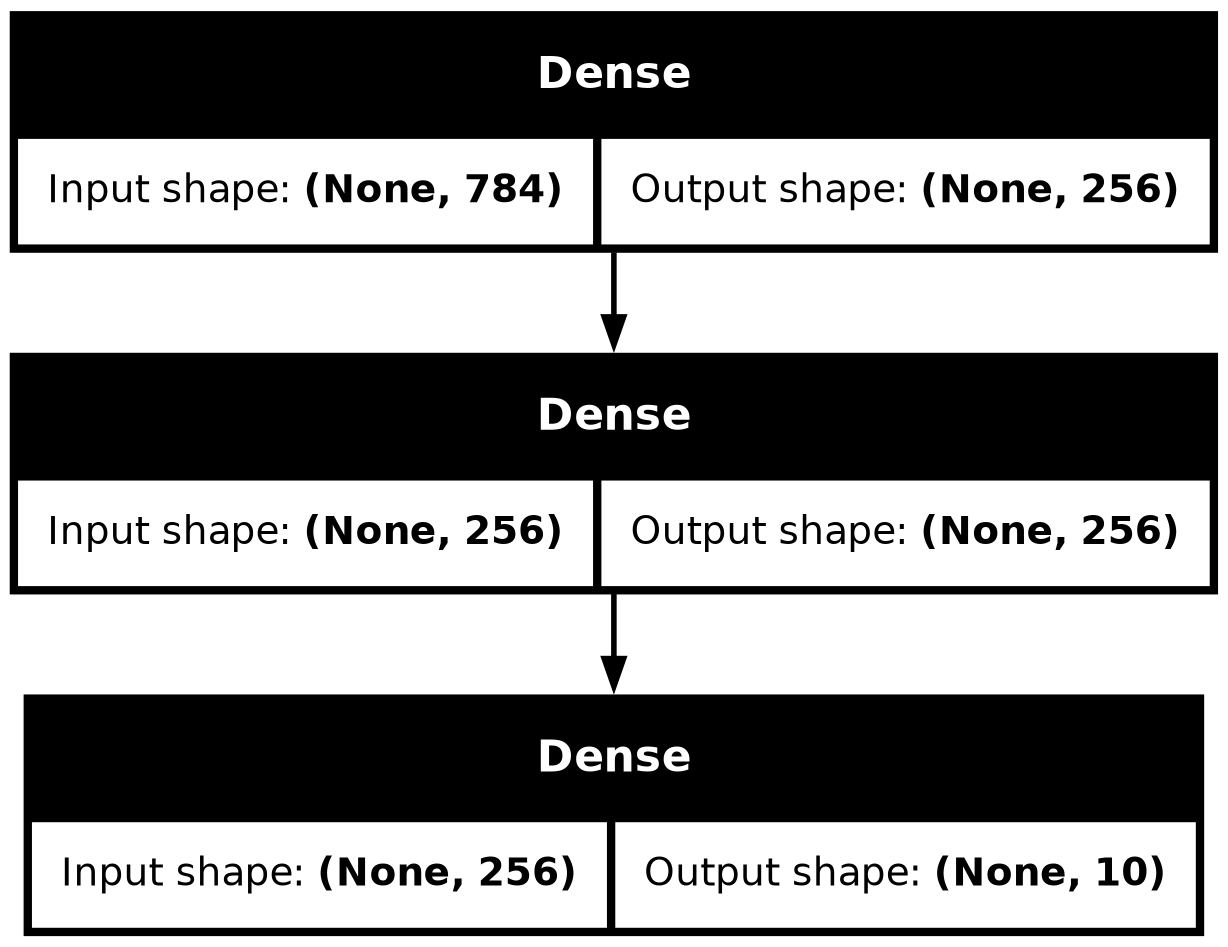

In [119]:
plot_model(model,to_file='mlp-mnist.png',show_shapes=True)


In [120]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [121]:
H=model.fit(x_train,y_train,batch_size=batch_size,epochs=20,validation_split=0.3)

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8422 - loss: 0.5619 - val_accuracy: 0.9548 - val_loss: 0.1545
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9643 - loss: 0.1194 - val_accuracy: 0.9660 - val_loss: 0.1140
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9781 - loss: 0.0708 - val_accuracy: 0.9683 - val_loss: 0.1042
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9852 - loss: 0.0489 - val_accuracy: 0.9714 - val_loss: 0.1008
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9868 - loss: 0.0414 - val_accuracy: 0.9696 - val_loss: 0.1069
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9921 - loss: 0.0273 - val_accuracy: 0.9714 - val_loss: 0.1026
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9947 - loss: 0.0179 - val_accuracy: 0.9731 - val_loss: 0.1012
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9957 - loss: 0.0140 - val_accuracy: 0.

In [122]:
loss,acc=model.evaluate(x_test,y_test)
print('Test accuracy: %.1f%%'%(100*acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.1299
Test accuracy: 97.9%


In [123]:
loss,acc=model.evaluate(x_train,y_train)
print('Train accuracy: %.1f%%'%(100*acc))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9979 - loss: 0.0107
Train accuracy: 99.2%


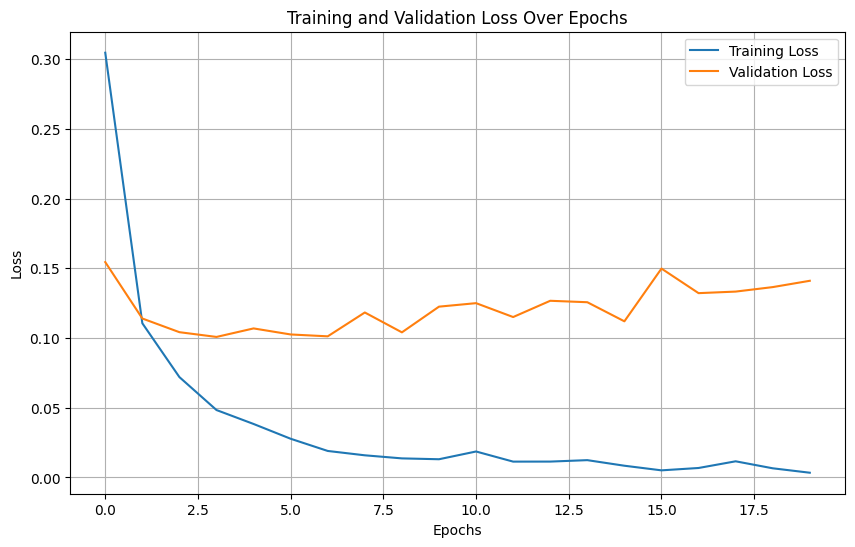

In [125]:
h = H.history

# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Adding L2 regularization

In [126]:
import keras
# because we have high validation loss
model=Sequential()
model.add(Dense(hidden_units,input_dim=input_size,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(hidden_units,activation='relu'))
model.add(Dense(num_labels,activation='softmax'))



model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3) #you can specify a validation set or not (it's optional). You can add "validation_split=0.3" in case you want to add validation set.

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8399 - loss: 0.8005 - val_accuracy: 0.9486 - val_loss: 0.2986
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9594 - loss: 0.2521 - val_accuracy: 0.9606 - val_loss: 0.2224
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9723 - loss: 0.1762 - val_accuracy: 0.9651 - val_loss: 0.1879
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9760 - loss: 0.1573 - val_accuracy: 0.9662 - val_loss: 0.1757
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9799 - loss: 0.1318 - val_accuracy: 0.9708 - val_loss: 0.1548
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9808 - loss: 0.1196 - val_accuracy: 0.9675 - val_loss: 0.1649
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9825 - loss: 0.1132 - val_accuracy: 0.9706 - val_loss: 0.1608
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9831 - loss: 0.1166 - val_accuracy: 0.

In [127]:
loss,acc=model.evaluate(x_test,y_test)
print('Test accuracy: %.1f%%'%(100*acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.1491
Test accuracy: 97.5%


In [128]:
loss,acc=model.evaluate(x_train,y_train)
print('Train accuracy: %.1f%%'%(100*acc))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0746
Train accuracy: 98.6%


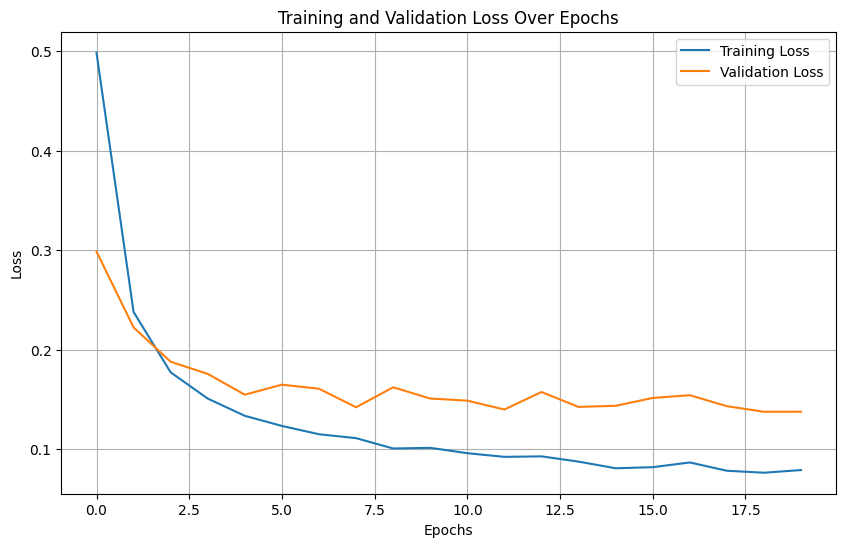

In [129]:
h = H.history

# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [130]:
import keras
from tensorflow.keras.layers import Dense, Dropout
# because we have high validation loss
model=Sequential()
model.add(Dense(hidden_units,input_dim=input_size,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(dropout))
model.add(Dense(hidden_units,activation='relu'))
model.add(Dense(num_labels,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])



H = model.fit(x_train, y_train, epochs=20, batch_size=batch_size,validation_split=0.3)

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7785 - loss: 0.9665 - val_accuracy: 0.9463 - val_loss: 0.3259
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9385 - loss: 0.3414 - val_accuracy: 0.9597 - val_loss: 0.2532
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9516 - loss: 0.2702 - val_accuracy: 0.9638 - val_loss: 0.2158
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9556 - loss: 0.2446 - val_accuracy: 0.9665 - val_loss: 0.2043
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9615 - loss: 0.2168 - val_accuracy: 0.9686 - val_loss: 0.1917
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9621 - loss: 0.2059 - val_accuracy: 0.9702 - val_loss: 0.1869
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9651 - loss: 0.2017 - val_accuracy: 0.9708 - val_loss: 0.1812
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9638 - loss: 0.2018 - val_accuracy: 0.

In [131]:
loss,acc=model.evaluate(x_test,y_test)
print('Test accuracy: %.1f%%'%(100*acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.1706
Test accuracy: 97.6%


In [132]:
loss,acc=model.evaluate(x_train,y_train)
print('Train accuracy: %.1f%%'%(100*acc))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9860 - loss: 0.1273
Train accuracy: 98.3%


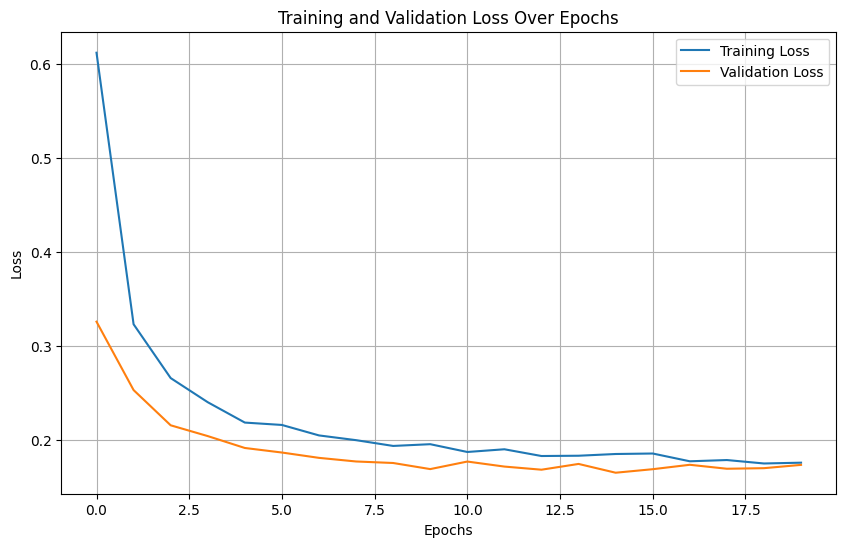

In [133]:
h = H.history

# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()